In [1]:
import shutil
import random 
import os
import time
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def reset_directory(dir_path):
    """
    Deletes the contents of a directory and then recreates the directory.
    
    Arguments:
    dir_path (str): The path of the directory to reset.
    
    Returns:
    None
    """

    # If the directory is already empty, print a message and return

    if len(os.listdir(dir_path)) == 0 :
        print(dir_path + " is already empty")
        return

    # Print a message and record the starting time
    beg = time.time()
    print("resetting "+ dir_path)

    # Delete the directory and all its contents
    shutil.rmtree(dir_path)

    # Create an empty directory in the same location
    os.makedirs(dir_path)
    print(dir_path + " is now empty")
    print("timing : " + str(time.time() - beg))


In [3]:
def extract_corrupt_img_files(dir_path):
  """
  Gets corrupted image files within a directory
  
    Arguments:
        dir_path: a string representing the path for the target directory

    Returns:
        a list of the paths for the corrupted image files

  """ 
  i = 0
  beg = time.time()
  corrupted = []
  for filename in os.listdir(dir_path):
    i +=1
    if (i % 50 == 0):
      print(i, end =" ")
    if (i % 1000 == 0):
      print()
    try:
      img = Image.open(dir_path + '/' + filename)
    except:
      corrupted.append(filename)
      continue

  end = time.time()
  print()
  print('*' * 50) 
  print("\nTASK FINISHED IN " + str(end - beg) + " seconds ")
  print("{} corrupted files found in {}".format(len(corrupted), dir_path))
  print()
  print('*' * 50) 
  return corrupted

In [4]:
def copy_clean(src = '', dest ='', ignore = []):
    """
    Copies all the files from the source directory to the destination directory, ignoring the files specified in the ignore list.
    
    Parameters:
    src (str): The path of the source directory.
    dest (str): The path of the destination directory.
    ignore (list): A list of file names to ignore.
    
    Returns:
    None
    """
    beg = time.time()
    print("Copying file from " + src + " to " + dest)
    i = 0
    j = 0
    for filename in (os.listdir(src)):
        i += 1
        if filename not in ignore:
            shutil.copy(src + '/' + filename, dest + '/' + filename)
            j+=1
        if (i % 100 == 0):
            print(i, end = " ")
        if (i % 1000 == 0):
            print()
        
    end = time.time()
    print()
    print(j)
    print("Copying {} files finished in {} seconds ".format(len(os.listdir(dest)),int(end - beg)))

In [5]:
def train_test_validation_split(data_path = '',test_split = 0.15, validation_split = 0.15):

    """
    Splits a dataset into three subsets: a training set, a validation set, and a test set.
    
    Parameters:
    data_path (str): The path of the directory containing the dataset.
    test_split (float): The fraction of the dataset to include in the test set.
    validation_split (float): The fraction of the remaining dataset to include in the validation set.
    
    Returns:
    tuple: A tuple containing three lists of file names: the training set, the test set, and the validation set.
    """

    # Calculate the total number of files in the dataset
    data_size = len(os.listdir(data_path))

    # Calculate the number of files to include in the test and validation sets
    test_size = int(test_split * data_size)
    validation_size = int(validation_split * data_size)
    

    
    test_sample = []
    validation_sample = []
    train_sample = []
    
    # Select a random sample of files for the test set
    test_sample = random.sample(os.listdir(data_path),test_size )
    
    # Calculate the remaining files that are not in the test set
    train_data = set(os.listdir(data_path)) - set(test_sample)
    train_data = list(train_data)
    
    # Select a random sample of files from the remaining files for the validation set
    validation_sample = random.sample(train_data,validation_size )
    
    # Calculate the remaining files that are not in the validation set
    train_sample = set(train_data) - set(validation_sample)
    train_sample = list(train_sample)
    
    # Print the sizes of the train, test, and validation sets
    print('train size ' + str(len(train_sample)))
    print('test size ' + str(len(test_sample)))
    print('validation size ' + str(len(validation_sample)))
    
    return train_sample, test_sample , validation_sample

    

In [6]:
def split_data_to_dir(class_str = '',src_path ='', dest_path ='',samples ={}):
  """
  Copies samples (represented by a dict) from one source directory to a destination directory 
  
    Arguments:
        class_str: a string representing the class
        src_path: a string representing the path for the source directory
        dest_path: a string representing the path for the destination directory
        sample: a python Dict representing either test or train or validation samples 

    Returns:
        None

  """

  src_path = src_path + '/' + class_str
  dest_path = dest_path + '/' + class_str
  beg = time.time()
  print(" Sending test samples to  " + dest_path)
  i = 0 # to track haw many imgs are copied
  for filename in samples[class_str]:
    shutil.copy(src_path + '/' + filename, dest_path + '/'+ class_str + "_" + filename)
    i+=1
    if (i % 25 == 0 ):
      print(i, end = " ")
    if (i % 500 == 0):
      print()

  endt = time.time()
  print("nb of test samples for {} is {}".format(class_str, str(i)))
  print("Sending {} test samples complete in {} seconds ".format(str(i),str(endt - beg)))

In [7]:
import matplotlib.pyplot as plt
from cv2 import imread

def display_imgs_from_path(path='', rows = 1, cols = 1):
  """
  Displays random rows * cols images from a directory
    
  Arguments:
      path: a string representing the path for the directory with the images to displat 
      rows: an integer representing the number of rows in the plots figure
      cols: an integer representing the number of columns in the plots figure

  Returns:
      None

  """
  fig = plt.figure(figsize=(8, 5))

  for i , img_name in enumerate(random.sample(os.listdir(path), rows * cols)):
    img = imread(path + '/' + img_name)
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name[:8])
    




In [14]:
print("Cat samples : {}".format(len(os.listdir("./kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog"))))
print("Dog samples : {}".format(len(os.listdir("./kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat"))))

Cat samples : 12501
Dog samples : 12501


In [16]:
dog_path = "./kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog"
cat_path = "./kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat"

corrupted_dog_imgs = extract_corrupt_img_files(dog_path)
corrupted_cat_imgs = extract_corrupt_img_files(cat_path)


50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 
1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 
2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950 3000 
3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 
4050 4100 4150 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000 
5050 5100 5150 5200 5250 5300 5350 5400 5450 5500 5550 5600 5650 5700 5750 5800 5850 5900 5950 6000 
6050 6100 6150 6200 6250 6300 6350 6400 6450 6500 6550 6600 6650 6700 6750 6800 6850 6900 6950 7000 
7050 7100 7150 7200 7250 7300 7350 7400 7450 7500 7550 7600 7650 7700 7750 7800 7850 7900 7950 8000 
8050 8100 8150 8200 8250 8300 8350 8400 8450 8500 8550 8600 8650 8700 8750 8800 8850 8900 8950 9000 
9050 9100 9150 9200 9250 9300 9350 9400 9450 9500 9550 9600 9650 9700 9750 9800 9850 9900 9950 10000 
10050 101

C:\Users\rubam\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


11450 11500 11550 11600 11650 11700 11750 11800 11850 11900 11950 12000 
12050 12100 12150 12200 12250 12300 12350 12400 12450 12500 
**************************************************

TASK FINISHED IN 83.2031991481781 seconds 
2 corrupted files found in ./kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog

**************************************************
50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 
1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 
2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950 3000 
3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 
4050 4100 4150 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000 
5050 5100 5150 5200 5250 5300 5350 5400 5450 5500 5550 5600 5650 5700 5750 5800 5850 5900 5950 6000 
6050 6100 6150 6200 6250 6300 6350 6400 6450 650

In [17]:
print(corrupted_dog_imgs)
print(corrupted_cat_imgs)

['11702.jpg', 'Thumbs.db']
['666.jpg', 'Thumbs.db']


Creating train, test and validation directories for each class.

In [18]:
"""
os.makedirs('./kaggle/working/Data/train')
os.makedirs('./kaggle/working/Data/test')
"""
try:
    os.makedirs('./kaggle/working/Dataset')

    os.makedirs('./kaggle/working/train/Cat')
    os.makedirs('./kaggle/working/test/Cat')

    os.makedirs('./kaggle/working/train/Dog')
    os.makedirs('./kaggle/working/test/Dog')

    os.makedirs('./kaggle/working/validation/Dog')
    os.makedirs('./kaggle/working/validation/Cat')
except FileExistsError :
    print("files already exists")
    pass

Creating directories for the uncorrupted data

In [19]:
os.makedirs('./kaggle/working/Dataset/Cat')
os.makedirs('./kaggle/working/Dataset/Dog')

In [20]:
original_dataset_path = './kaggle/input/microsoft-catsvsdogs-dataset/PetImages'
clean_dataset_path = './kaggle/working/Dataset'
test_path = './kaggle/working/test'
train_path = './kaggle/working/train'
validation_path = './kaggle/working/validation'


In [21]:
reset_directory(clean_dataset_path +'/Cat')


./kaggle/working/Dataset/Cat is already empty


Copying clean (i.e uncorrupted) data to their respective directories.

In [22]:
reset_directory(clean_dataset_path +'/Cat')

copy_clean(src = original_dataset_path + '/Cat',
           dest = clean_dataset_path +'/Cat',
           ignore = corrupted_cat_imgs)
print(len(os.listdir(clean_dataset_path +'/Cat')))

./kaggle/working/Dataset/Cat is already empty
Copying file from ./kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat to ./kaggle/working/Dataset/Cat
100 200 300 400 500 600 700 800 900 1000 
1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 
2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 
3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 
4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 
5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 
6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 
7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 
8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 
9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 
10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 
11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 
12100 12200 12300 12400 12500 
12499
Copying 12499 files finished in 17 seconds 
12499


In [23]:
reset_directory(clean_dataset_path +'/Dog')

copy_clean(src = original_dataset_path + '/Dog',
           dest = clean_dataset_path +'/Dog',
           ignore = corrupted_dog_imgs)
print(len(os.listdir(clean_dataset_path +'/Dog')))

./kaggle/working/Dataset/Dog is already empty
Copying file from ./kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog to ./kaggle/working/Dataset/Dog
100 200 300 400 500 600 700 800 900 1000 
1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 
2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 
3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 
4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 
5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 
6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 
7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 
8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 
9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 
10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 
11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 
12100 12200 12300 12400 12500 
12499
Copying 12499 files finished in 17 seconds 
12499


Splitting Data into train, validation and test sets

In [24]:
cat_train_sample, cat_test_sample , cat_validation_sample = train_test_validation_split(data_path = clean_dataset_path +'/Cat')

train size 8751
test size 1874
validation size 1874


In [25]:
dog_train_sample, dog_test_sample , dog_validation_sample = train_test_validation_split(data_path = clean_dataset_path +'/Dog')

train size 8751
test size 1874
validation size 1874


In [26]:
test_samples = { 'Cat': cat_test_sample,
                 'Dog': dog_test_sample,
                }

validation_samples = { 'Cat': cat_validation_sample,
                       'Dog': dog_validation_sample,
                      }
train_samples = { 'Cat': cat_train_sample,
                  'Dog': dog_train_sample,
                      }

In [27]:
clean_dataset_path = './kaggle/working/Dataset'
test_path = './kaggle/working/test'
train_path = './kaggle/working/train'
validation_path = './kaggle/working/validation'

Sending train, validation and test sets to their respective directories.

In [28]:
reset_directory(test_path +"/Cat")
split_data_to_dir(class_str = "Cat", src_path = clean_dataset_path, dest_path = test_path, samples = test_samples)
print(len(os.listdir(test_path +"/Cat")))

./kaggle/working/test/Cat is already empty
 Sending test samples to  ./kaggle/working/test/Cat
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 nb of test samples for Cat is 1874
Sending 1874 test samples complete in 13.590141534805298 seconds 
1874


In [29]:
reset_directory(train_path +"/Cat")
split_data_to_dir(class_str = "Cat", src_path = clean_dataset_path, dest_path = train_path, samples = train_samples)
print(len(os.listdir(train_path +"/Cat")))

./kaggle/working/train/Cat is already empty
 Sending test samples to  ./kaggle/working/train/Cat
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 2000 
2025 2050 2075 2100 2125 2150 2175 2200 2225 2250 2275 2300 2325 2350 2375 2400 2425 2450 2475 2500 
2525 2550 2575 2600 2625 2650 2675 2700 2725 2750 2775 2800 2825 2850 2875 2900 2925 2950 2975 3000 
3025 3050 3075 3100 3125 3150 3175 3200 3225 3250 3275 3300 3325 3350 3375 3400 3425 3450 3475 3500 
3525 3550 3575 3600 3625 3650 3675 3700 3725 3750 3775 3800 3825 3850 3875 3900 3925 3950 3975 4000 
4025 4050 4075 4100 4125 4150 4175 4200 4225 4250 4275 4300 4325 4350 4375 4400 4425 4450 4475 4500 
4525 4550 4575 4600 4625 4650 4675 4

In [30]:
reset_directory(validation_path +"/Cat")
split_data_to_dir(class_str = "Cat", src_path = clean_dataset_path, dest_path = validation_path, samples = validation_samples)
print(len(os.listdir(validation_path  +"/Cat")))

./kaggle/working/validation/Cat is already empty
 Sending test samples to  ./kaggle/working/validation/Cat
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 nb of test samples for Cat is 1874
Sending 1874 test samples complete in 14.581469297409058 seconds 
1874


In [31]:
reset_directory(test_path +"/Dog")
split_data_to_dir(class_str = "Dog", src_path = clean_dataset_path, dest_path = test_path, samples = test_samples)
print(len(os.listdir(test_path +"/Dog")))

./kaggle/working/test/Dog is already empty
 Sending test samples to  ./kaggle/working/test/Dog
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 nb of test samples for Dog is 1874
Sending 1874 test samples complete in 13.756678104400635 seconds 
1874


In [32]:
reset_directory(train_path +"/Dog")
split_data_to_dir(class_str = "Dog", src_path = clean_dataset_path, dest_path = train_path, samples = train_samples)
print(len(os.listdir(train_path +"/Dog")))

./kaggle/working/train/Dog is already empty
 Sending test samples to  ./kaggle/working/train/Dog
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 2000 
2025 2050 2075 2100 2125 2150 2175 2200 2225 2250 2275 2300 2325 2350 2375 2400 2425 2450 2475 2500 
2525 2550 2575 2600 2625 2650 2675 2700 2725 2750 2775 2800 2825 2850 2875 2900 2925 2950 2975 3000 
3025 3050 3075 3100 3125 3150 3175 3200 3225 3250 3275 3300 3325 3350 3375 3400 3425 3450 3475 3500 
3525 3550 3575 3600 3625 3650 3675 3700 3725 3750 3775 3800 3825 3850 3875 3900 3925 3950 3975 4000 
4025 4050 4075 4100 4125 4150 4175 4200 4225 4250 4275 4300 4325 4350 4375 4400 4425 4450 4475 4500 
4525 4550 4575 4600 4625 4650 4675 4

In [33]:
reset_directory(validation_path +"/Dog")
split_data_to_dir(class_str = "Dog", src_path = clean_dataset_path, dest_path = validation_path, samples = validation_samples)
print(len(os.listdir(validation_path  +"/Dog")))

./kaggle/working/validation/Dog is already empty
 Sending test samples to  ./kaggle/working/validation/Dog
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 nb of test samples for Dog is 1874
Sending 1874 test samples complete in 13.575140953063965 seconds 
1874


Quick checking the sets sizes.

In [34]:
print("Folders in test " + str(len(os.listdir(test_path))))
print("Samples in test/Cat: " + str(len(os.listdir(test_path + "/Cat"))))
print("Samples in test/Dog: " + str(len(os.listdir(test_path + "/Dog"))))

print("Folders in validation " + str(len(os.listdir(validation_path))))
print("Samples in validation/Cat: " + str(len(os.listdir(validation_path + "/Cat"))))
print("Samples in validation/Dog: " + str(len(os.listdir(validation_path + "/Dog"))))

print("Folders in train " + str(len(os.listdir(train_path))))
print("Samples in train/Cat: " + str(len(os.listdir(train_path + "/Cat"))))
print("Samples in train/Dog: " + str(len(os.listdir(train_path + "/Dog"))))

Folders in test 2
Samples in test/Cat: 1874
Samples in test/Dog: 1874
Folders in validation 2
Samples in validation/Cat: 1874
Samples in validation/Dog: 1874
Folders in train 2
Samples in train/Cat: 8751
Samples in train/Dog: 8751


Taking a look at random samples of data for each class in the train, validation and test sets.

In [35]:
def keep_n_samples(path = '', to_keep = 0.5):
    for class_dir in os.listdir(path):
        
        class_samples = os.listdir(path +'/'+ class_dir)
        print("initial {} files : {}".format(class_dir,len(class_samples)))
        samples_to_remove = random.sample(class_samples, int(len(class_samples) * (1-to_keep)))
        print("{} files to be removed : {}".format(class_dir,len(samples_to_remove)))
        #print(len(set(class_samples) - set(samples_to_remove)))
        #print(set(class_samples) - set(samples_to_remove))
        
        for filename in samples_to_remove:
            os.remove(path +'/'+ class_dir + '/' + filename)
            #print(path +'/'+ class_dir + '/' + filename)

        
        #print(len(class_dir))
        #print(class_dir)
    

In [36]:
#keep_n_samples(test_path)

In [37]:
print("Folders in test " + str(len(os.listdir(test_path))))
print("Samples in test/Cat: " + str(len(os.listdir(test_path + "/Cat"))))
print("Samples in test/Dog: " + str(len(os.listdir(test_path + "/Dog"))))

print("Folders in validation " + str(len(os.listdir(validation_path))))
print("Samples in validation/Cat: " + str(len(os.listdir(validation_path + "/Cat"))))
print("Samples in validation/Dog: " + str(len(os.listdir(validation_path + "/Dog"))))

print("Folders in train " + str(len(os.listdir(train_path))))
print("Samples in train/Cat: " + str(len(os.listdir(train_path + "/Cat"))))
print("Samples in train/Dog: " + str(len(os.listdir(train_path + "/Dog"))))

Folders in test 2
Samples in test/Cat: 1874
Samples in test/Dog: 1874
Folders in validation 2
Samples in validation/Cat: 1874
Samples in validation/Dog: 1874
Folders in train 2
Samples in train/Cat: 8751
Samples in train/Dog: 8751


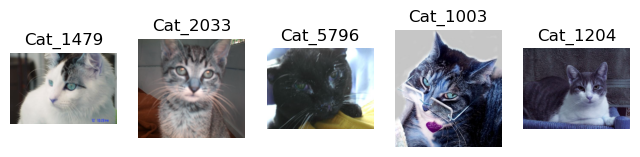

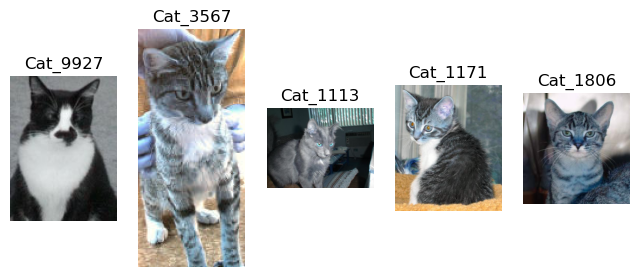

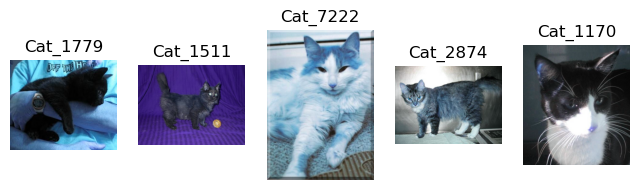

In [38]:
display_imgs_from_path(path=test_path +'/Cat', rows = 1, cols = 5)
display_imgs_from_path(path=train_path +'/Cat', rows = 1, cols = 5)
display_imgs_from_path(path=validation_path +'/Cat', rows = 1, cols = 5)


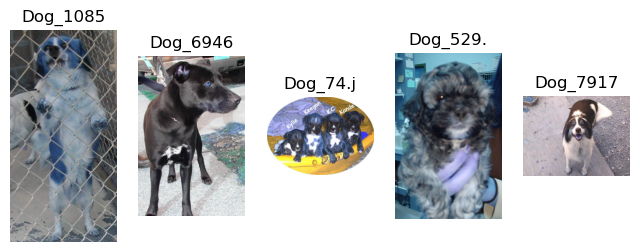

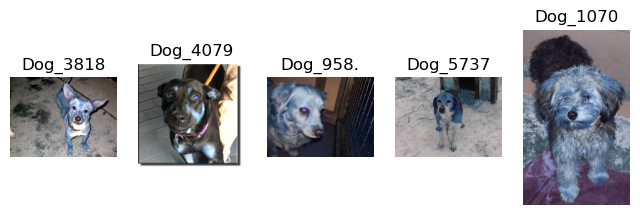

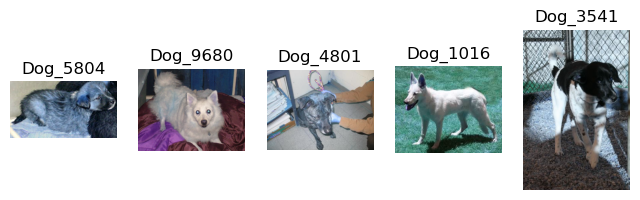

In [39]:
display_imgs_from_path(path=test_path +'/Dog', rows = 1, cols = 5)
display_imgs_from_path(path=train_path +'/Dog', rows = 1, cols = 5)
display_imgs_from_path(path=validation_path +'/Dog', rows = 1, cols = 5)

In [40]:
# Import the ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Set the image dimensions and Batch size
WIDTH = 224
HEIGHT = 224
IMG_SIZE = (WIDTH , HEIGHT)
BATCH = 32

# Create an ImageDataGenerator object for the validation set
validation_datagen = ImageDataGenerator(rescale = 1./255)
# Create an ImageDataGenerator object for the test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# Create an ImageDataGenerator object for the training set

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)



In [41]:
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size = IMG_SIZE,
                                                    classes=['Cat' , 'Dog'],
                                                    class_mode='binary',
                                                    batch_size=BATCH,
                                                    seed = 1
                                                    
                                                    )
print(train_generator.class_indices)
print(train_generator.num_classes)
print(train_generator.samples)

Found 17502 images belonging to 2 classes.
{'Cat': 0, 'Dog': 1}
2
17502


In [42]:
validation_generator = validation_datagen.flow_from_directory(validation_path, 
                                                    target_size = IMG_SIZE,
                                                    classes=['Cat' , 'Dog'],
                                                    class_mode='binary',
                                                    batch_size=BATCH,
                                                    seed = 1 )
print(validation_generator.class_indices)

Found 3748 images belonging to 2 classes.
{'Cat': 0, 'Dog': 1}


In [43]:
test_generator = test_datagen.flow_from_directory(test_path, 
                                                    target_size = IMG_SIZE,
                                                    classes=['Cat' , 'Dog'],
                                                    class_mode='binary',
                                                    batch_size=BATCH,
                                                    seed = 1 )
print(test_generator.class_indices)

Found 3748 images belonging to 2 classes.
{'Cat': 0, 'Dog': 1}


## Building the model :


In [44]:
from tensorflow.keras.applications import mobilenet_v2

mnet_base = mobilenet_v2.MobileNetV2(input_shape = (WIDTH,HEIGHT,3),
                                    include_top = False
                                    )
mnet_base.summary()
mnet_base.trainable = False




9406464/9406464 [==============================] - 12s 1us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (

                                                                     'block_2_project_BN[0][0]']  
                                                                                                  
 block_3_expand (Conv2D)     (None, 56, 56, 144)          3456      ['block_2_add[0][0]']         
                                                                                                  
 block_3_expand_BN (BatchNo  (None, 56, 56, 144)          576       ['block_3_expand[0][0]']      
 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )        

                                                                                                  
 block_6_pad (ZeroPadding2D  (None, 29, 29, 192)          0         ['block_6_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_6_depthwise (Depthwi  (None, 14, 14, 192)          1728      ['block_6_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_d

 LU)                                                                                              
                                                                                                  
 block_9_project (Conv2D)    (None, 14, 14, 64)           24576     ['block_9_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_9_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
          

 block_12_add (Add)          (None, 14, 14, 96)           0         ['block_11_add[0][0]',        
                                                                     'block_12_project_BN[0][0]'] 
                                                                                                  
 block_13_expand (Conv2D)    (None, 14, 14, 576)          55296     ['block_12_add[0][0]']        
                                                                                                  
 block_13_expand_BN (BatchN  (None, 14, 14, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
          

 block_16_expand_BN (BatchN  (None, 7, 7, 960)            3840      ['block_16_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_16_expand_relu (ReLU  (None, 7, 7, 960)            0         ['block_16_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_16_depthwise (Depthw  (None, 7, 7, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormali

In [45]:
depth = len(mnet_base.layers)
print(depth)
"""for layer in mnet_base.layers[:-74]:
    print(layer.name)"""

154


'for layer in mnet_base.layers[:-74]:\n    print(layer.name)'

In [46]:
IMG_SHAPE = IMG_SIZE + (3,)


SEED = 1

print(IMG_SHAPE)

(224, 224, 3)


### Building the entire model:

In [47]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, ReLU, Lambda
from tensorflow.keras import Input
from tensorflow.keras import Model

In [48]:
inputs = Input(shape = IMG_SHAPE )
x = mnet_base(inputs)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.25)(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.25)(x)
outputs = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs, outputs)



In [49]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 1280)              0         
                                                             

In [50]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, CSVLogger,ReduceLROnPlateau 

models_path = '/kaggle/working/Models'
#os.makedirs(models_path)

history_filename='log.csv'
checkpoint_filename =' weights_best.hdf5'


history_logger= CSVLogger(history_filename, separator=",", append=True)

model_checkpoint = ModelCheckpoint(filepath = checkpoint_filename,
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   save_weights_only=True,
                                   verbose=1,
                                   mode = 'max')
callbacks = [model_checkpoint, history_logger]

 ## Training and compiling the model
 It's always crucial to remember to recompile the model each time we tweak the number of frozen layers.

In [53]:
from tensorflow.keras.optimizers import Adam
LEARNING_RATE = 0.001 
model.compile(optimizer = Adam(LEARNING_RATE),
             loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )


In [54]:
beg = int(time.time())

history = model.fit(
        train_generator,
        steps_per_epoch = train_generator.samples  // BATCH,
        epochs = 5,
        validation_data = validation_generator,
        validation_steps = validation_generator.samples // BATCH,
        callbacks = callbacks)

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training Phase 1 layers took {} hrs -- {} mins -- {} secs".format(hrs,mins,secs))
model.save_weights('./first_try_weights.h5')
model.save('./kaggle/working/first_try.h5')


Epoch 1/5


353/546 [==================>...........] - ETA: 2:09 - loss: 0.1036 - accuracy: 0.9620

C:\Users\rubam\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


546/546 [==============================] - ETA: 0s - loss: 0.0950 - accuracy: 0.9645
Epoch 1: val_accuracy improved from -inf to 0.97756, saving model to  weights_best.hdf5
546/546 [==============================] - 423s 766ms/step - loss: 0.0950 - accuracy: 0.9645 - val_loss: 0.0521 - val_accuracy: 0.9776
Epoch 2/5
546/546 [==============================] - ETA: 0s - loss: 0.0666 - accuracy: 0.9749
Epoch 2: val_accuracy improved from 0.97756 to 0.98210, saving model to  weights_best.hdf5
546/546 [==============================] - 302s 553ms/step - loss: 0.0666 - accuracy: 0.9749 - val_loss: 0.0474 - val_accuracy: 0.9821
Epoch 3/5
546/546 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9754
Epoch 3: val_accuracy did not improve from 0.98210
546/546 [==============================] - 277s 508ms/step - loss: 0.0625 - accuracy: 0.9754 - val_loss: 0.0450 - val_accuracy: 0.9818
Epoch 4/5
546/546 [==============================] - ETA: 0s - loss: 0.0557 - accuracy: 0.

PermissionError: [Errno 13] Unable to create file (unable to open file: name = '/first_try_weights.h5', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

In [58]:
model.save_weights('./first_try_weights.h5')
model.save('./kaggle/working/first_try.h5')

In [60]:
model.load_weights("./kaggle/working/weights_best.hdf5")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './kaggle/working/weights_best.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [61]:
scores = model.evaluate(test_generator)
print("loss = {:.2f}".format(scores[0]))
print("accuracy = {:.2f}% ".format(scores[1] *100))

118/118 [==============================] - 52s 441ms/step - loss: 0.0442 - accuracy: 0.9827
loss = 0.04
accuracy = 98.27% 


Great ! Our first try gave us an accuracy of 98.27% in 5 epochs!

In [62]:
from sklearn.metrics import confusion_matrix
ys = []
y_predictions = []

for step in range( test_generator.samples // 32):
    (x, y) = next(test_generator)
    y = y.astype(int)
    ys = ys + list(y)

    #Predict
    y_prediction = model.predict(x)
    #print(y_prediction)
    y_prediction = np.round(y_prediction,1).astype(int)
    #print(y_prediction.shape)
    y_prediction = np.reshape(y_prediction,y.shape)
    y_predictions  = y_predictions + list(y_prediction)
    #print(y_prediction)

1/1 [==============================] - 0s 290ms/step


In [63]:
#Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(ys, y_predictions , normalize='pred')
print(cm)

[[0.94865277 0.00281373]
 [0.05134723 0.99718627]]


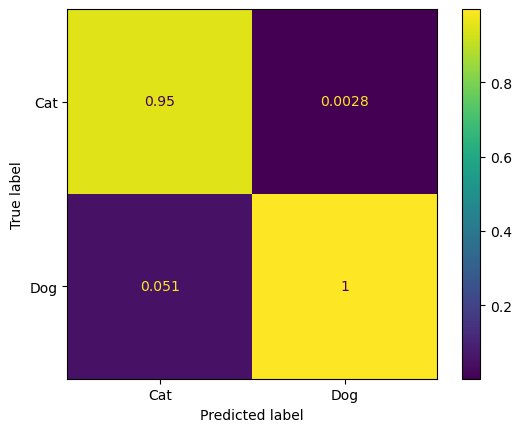

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=["Cat","Dog"])
disp.plot()
plt.show()

6.257651e-05
0.009630682
1.228329e-06
0.17141238
6.7387715e-05
1.00561e-07
8.4957016e-08
6.4060094e-07
6.713776e-05
0.0019956804


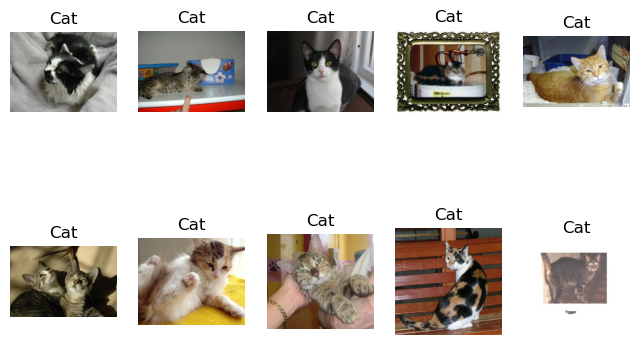

In [65]:
labels = ["Cat","Dog"]
fig = plt.figure(figsize=(8, 5))

    
for j in range(10):
    i = random.randint(0,1000)
    cat_test_img = cv2.imread(train_path + '/Cat'+'/'+
                              os.listdir(train_path + '/Cat')[i])
    #print(os.listdir(test_path + '/Dog')[5])
    #print(type(dog_test_img))
    #print(dog_test_img.shape)
    cat_test_img = cv2.cvtColor(cat_test_img,cv2.COLOR_BGR2RGB)
    fig.add_subplot(2, 5, j+1)
    plt.imshow(cat_test_img)
    plt.axis('off')
    
    cat_test_img = cv2.resize(cat_test_img,(224,224))
    cat_test_img = np.reshape(cat_test_img,(1,224,224,3))
    cat_test_img = cat_test_img / 255
    #print(dog_test_img.shape)
    
    results = model.predict(cat_test_img,verbose = 0)
    results = np.squeeze(results)
    print(results)
    label_idx = np.round(results,1).astype(int)
    plt.title(labels[label_idx])


0.9999983
0.9979141
0.9999997
0.98981297
0.99988645
0.9999674
0.99999917
0.9992424
0.9872399
1.0


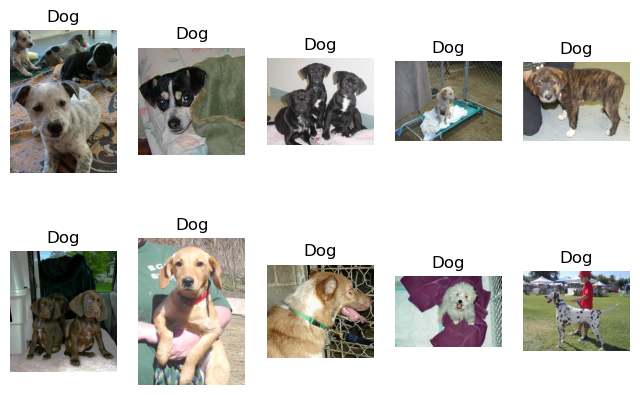

In [66]:
fig = plt.figure(figsize=(8, 5))

    
for j in range(10):
    i = random.randint(0,1000)
    dog_test_img = cv2.imread(train_path + '/Dog'+'/'+
                              os.listdir(train_path + '/Dog')[i])
    #print(os.listdir(test_path + '/Dog')[5])
    #print(type(dog_test_img))
    #print(dog_test_img.shape)
    dog_test_img = cv2.cvtColor(dog_test_img,cv2.COLOR_BGR2RGB)
    fig.add_subplot(2, 5, j+1)
    plt.imshow(dog_test_img)
    plt.axis('off')
    
    dog_test_img = cv2.resize(dog_test_img,(224,224))
    dog_test_img = np.reshape(dog_test_img,(1,224,224,3))
    dog_test_img = dog_test_img / 255
    #print(dog_test_img.shape)
    
    results = model.predict(dog_test_img,verbose = 0)
    results = np.squeeze(results)
    print(results)
    label_idx = np.round(results,1).astype(int)
    plt.title(labels[label_idx])


## Conclusion 

Our models has a final test accuracy of almost 98.51 % despite using only half of our training data , whereas the previous project only achieved 95% accuracy while using the entirety of the training set.

This example clearly demonstrates the power of transfer learning ! 

Transfer learning with MobileNet V2 is an effective approach for image classification tasks as it allows for the use of pre-trained models that have been trained on massive amounts of data. This approach reduces the training time and computational resources required, and can achieve high accuracy with relatively little training data.